In [1]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
import cv2
# 指定参数：迭代10次，误差小于1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [22]:
import numpy as np
digits.data = digits.data.astype(np.float32)
compactness, clusters, centers = cv2.kmeans(digits.data,
                                         10,
                                         None,
                                         criteria,
                                         10,
                                         flags)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

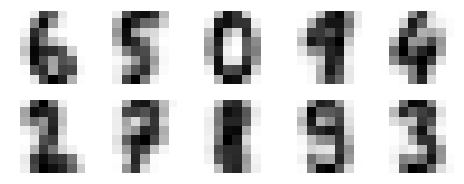

In [24]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = centers.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):  # flat返回的是一个迭代器，可以用for访问数组每一个元素
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [25]:
from scipy.stats import mode
labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel()==i)
    labels[mask] = mode(digits.target[mask])[0]

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7762938230383973

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, labels)

array([[176,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 154,  24,   1,   0,   1,   2,   0,   0,   0],
       [  1,  10, 148,  14,   0,   0,   0,   3,   0,   1],
       [  0,   4,   1, 160,   0,   6,   0,   3,   0,   9],
       [  0,   2,   0,   0, 165,   1,   0,  13,   0,   0],
       [  0,   4,   0,   0,   1, 118,   2,   0,   0,  57],
       [  1,   3,   0,   0,   1,   0, 176,   0,   0,   0],
       [  0,  19,   0,   0,   0,   0,   0, 160,   0,   0],
       [  0,  97,   3,   2,   0,  16,   2,   3,   0,  51],
       [  0,  25,   0,   7,   0,   6,   0,   4,   0, 138]])